In [1]:
# import requests 
# from bs4 import BeautifulSoup 
# import re
import nltk
from nltk.stem import WordNetLemmatizer #for grouping similar meaning words in single item
from nltk.stem.porter import PorterStemmer #reducing similar words in single word
from nltk.corpus import stopwords
nltk.download('punkt') # divides text into list of sentences
nltk.download('wordnet')
nltk.download('stopwords')
import os
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
import string
import pickle
import re
import matplotlib.pyplot as plt
import collections
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Using TensorFlow backend.


In [0]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))
labels=newsgroups_train.target
texts = newsgroups_train.data

In [0]:
MAX_NB_WORDS = 9999999

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)

In [0]:
use_words=list(tokenizer.word_index.keys())
use_words=set(use_words)

In [0]:
stop_words=set(stopwords.words('english'))

def to_list(string_to_conv):
  words = string_to_conv.split(' ')
  return words

def to_string(words):
  string_to_conv = ' '.join(words)
  return string_to_conv

def preprocess(string_to_conv):
  string_to_conv = re.sub(r'\d+', ' ', string_to_conv)
  words = to_list(string_to_conv)
  words = [word.lower() for word in words]
  words = [word for word in words if word not in stop_words]
  words = [word for word in words if word in use_words]
  words = [word for word in words if not word.isdigit()]
  words = [word for word in words if not len(word) == 1]
  
  string_to_conv = to_string(words)

  return string_to_conv

In [0]:
for i in range(0,5):
  print(i," ",newsgroups_train.data[i])

0   I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.
1   A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this

In [0]:
dic_without_preprocessing={}
dic={}
dic_without_preprocessing['Content']=newsgroups_train.data
dic_without_preprocessing['Labels']=newsgroups_train.target
dic['Content']=list(map(preprocess,newsgroups_train.data))
dic['Labels']=newsgroups_train.target
df = pd.DataFrame(dic_without_preprocessing)
df.to_csv('dataset_without_preprocessing.csv')
df = pd.DataFrame(dic)
df.to_csv('dataset.csv')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir('/content/drive/My Drive/MCA SEM 5/MINOR PROJECT')
print(os.getcwd())

/content/drive/My Drive/MCA SEM 5/MINOR PROJECT


In [0]:
print(dic['Content'][0:100])

['wondering anyone could enlighten car sports looked late called doors really front bumper separate rest anyone tellme model engine car whatever info funky looking please', 'fair number brave souls upgraded si clock oscillator experiences please send brief message experiences top speed cpu rated cards heat hour usage per floppy floppies especially summarizing next two please add base done clock upgrade answered', "well mac plus finally gave ghost weekend life way back i'm market machine bit sooner intended looking picking powerbook maybe questions somebody anybody know dirt next round i'd heard supposed make heard anymore since access wondering anybody anybody heard rumors price drops powerbook line like duo's went what's impression display could probably got mb disk rather really feel much display looks great really could opinions people use disk size money hit get active real subjective i've played around computer store breifly figured opinions actually uses machine daily might prove

In [9]:
content=dic['Content']
vectorizer = TfidfVectorizer()
vectorizer.fit(content)
tfidf = vectorizer.transform(content)#term frequency of different documents
data = pd.DataFrame(tfidf.todense(),index=list(range(0,len(dic['Content']))),columns=vectorizer.get_feature_names())
data

,aa,aaa,aaah,aaai,aah,aalternate,aamazing,aammmaaaazzzzzziinnnnggggg,aan,aanbieden,aangeboden,aangegeven,aangezien,aaron,aarp,aaw,ab,abandon,abandond,abandoned,abandoning,abandons,abbasids,abberation,abbie,abbott,abbreviated,abbreviation,abbreviations,abc,abd,abdel,abdication,abdomen,abdominal,abduct,abdul,abdulhamid,abdullah,abe,...,zq,zqvf,zr,zrh,zs,zsoft,zsq,zt,zterm,ztimer,zu,zua,zubin,zubov,zucker,zuiko,zulu,zumrut,zumwalt,zupancic,zupcic,zur,zurbrin,zurich,zurueckfuehren,zusman,zv,zvg,zvi,zvmk,zwaartepunten,zwakke,zware,zwarte,zwischen,zx,zy,zyxel,zz,³ation
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
data.to_csv('tfidf_csv.csv')

In [0]:
data = pd.DataFrame(dic['Labels'])
data.to_csv('labels_csv.csv',index=False)

In [0]:
labels=pd.read_csv('labels_csv.csv',usecols=[0])
labels=labels.values.tolist()
list1=[]
for values in labels:
  list1.append(values[0])
labels=list1.copy()
print(labels)

[7, 4, 4, 1, 14, 16, 13, 3, 2, 4, 8, 19, 4, 14, 6, 0, 1, 7, 12, 5, 0, 10, 6, 2, 4, 1, 12, 9, 15, 7, 6, 13, 12, 17, 18, 10, 8, 11, 8, 16, 9, 4, 3, 9, 9, 4, 4, 8, 12, 14, 5, 15, 2, 13, 17, 11, 7, 10, 2, 14, 12, 5, 4, 6, 7, 0, 11, 16, 0, 6, 17, 7, 12, 7, 3, 12, 11, 7, 2, 2, 0, 16, 1, 2, 7, 3, 2, 1, 10, 12, 12, 17, 12, 2, 8, 8, 18, 5, 0, 1, 6, 12, 8, 4, 17, 12, 12, 12, 1, 6, 18, 4, 3, 10, 9, 0, 13, 11, 5, 14, 15, 8, 4, 15, 15, 1, 0, 16, 9, 8, 6, 13, 6, 17, 14, 0, 9, 1, 2, 15, 13, 9, 2, 8, 2, 13, 2, 0, 15, 14, 1, 14, 17, 14, 4, 4, 7, 19, 1, 15, 17, 16, 2, 15, 9, 12, 6, 9, 6, 6, 18, 1, 10, 6, 10, 5, 2, 13, 3, 9, 13, 12, 13, 8, 4, 3, 9, 1, 12, 4, 2, 2, 11, 13, 4, 1, 12, 0, 16, 12, 16, 7, 17, 15, 11, 14, 2, 7, 10, 14, 15, 5, 16, 11, 4, 13, 7, 4, 13, 17, 1, 15, 17, 17, 9, 16, 17, 0, 16, 8, 13, 2, 14, 10, 2, 2, 9, 14, 9, 2, 15, 15, 4, 4, 11, 11, 11, 13, 0, 6, 18, 13, 0, 18, 16, 2, 9, 11, 9, 3, 0, 18, 7, 9, 14, 9, 10, 17, 8, 5, 3, 2, 13, 6, 7, 1, 11, 4, 12, 11, 6, 2, 14, 9, 1, 4, 11, 15, 15, 6, 5

In [0]:
fopen = open('tfidf_file','wb') 
pickle.dump(tfidf,fopen)
fopen.close()

In [0]:
fopen = open('tfidf_file','rb') 
tfidf = pickle.load(fopen)
fopen.close()

In [10]:
clf = KMeans(random_state=1, n_init=10, max_iter=300)
clf.fit(tfidf)
temp_list = list(clf.labels_)
print(temp_list)

dic = {}
for item in temp_list:
  if(item not in dic.keys()):
    dic[item]=1
  else:
    dic[item]+=1
dic = dict(collections.OrderedDict(sorted(dic.items())))
print(dic)

[1, 2, 7, 7, 2, 2, 2, 0, 3, 3, 7, 4, 2, 2, 2, 2, 3, 7, 7, 3, 7, 2, 7, 3, 2, 7, 2, 2, 4, 2, 7, 2, 2, 6, 2, 2, 7, 5, 2, 7, 7, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3, 4, 3, 4, 6, 7, 2, 7, 3, 2, 1, 1, 1, 2, 2, 1, 2, 2, 4, 2, 6, 4, 3, 2, 0, 2, 5, 2, 2, 3, 2, 7, 2, 1, 2, 2, 2, 2, 2, 1, 1, 6, 3, 0, 2, 2, 2, 2, 2, 3, 3, 3, 7, 2, 7, 2, 7, 7, 0, 2, 2, 7, 0, 2, 4, 7, 2, 2, 3, 2, 4, 7, 0, 2, 2, 1, 2, 7, 2, 7, 2, 2, 2, 6, 2, 2, 7, 0, 2, 4, 2, 2, 2, 2, 2, 7, 7, 7, 4, 7, 7, 2, 2, 2, 2, 2, 2, 4, 3, 2, 6, 2, 2, 1, 2, 2, 2, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 4, 4, 0, 0, 2, 2, 2, 7, 3, 3, 5, 2, 2, 3, 2, 4, 2, 7, 2, 2, 2, 4, 5, 2, 3, 2, 7, 4, 4, 7, 1, 2, 0, 2, 2, 3, 2, 2, 2, 4, 2, 2, 1, 7, 2, 7, 7, 2, 2, 2, 2, 2, 3, 3, 2, 1, 2, 3, 4, 2, 7, 2, 2, 5, 2, 1, 4, 1, 1, 1, 2, 2, 7, 3, 2, 2, 2, 0, 4, 7, 2, 2, 7, 1, 2, 6, 2, 2, 0, 1, 7, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 1, 2, 1, 4, 2, 2, 3, 2, 2, 1, 7, 6, 2, 2, 2, 2, 2, 2, 2, 4, 2, 7, 2, 2, 2, 3, 2, 2, 6, 7, 2, 4, 4, 2, 2, 2, 3, 1, 2, 1, 2, 7, 7, 2, 2, 1, 4, 7, 2, 

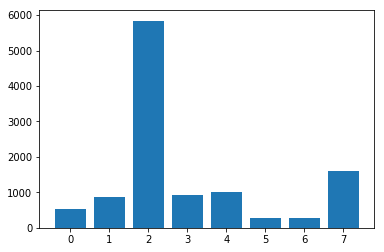

In [0]:
plt.bar(range(len(dic)), list(dic.values()), align='center')
plt.xticks(range(len(dic)), list(dic.keys()))
plt.show()

In [0]:
clf = KMeans(n_clusters=20, random_state=1, n_init=10, max_iter=300)
clf.fit(tfidf)
temp_list = list(clf.labels_)
print(temp_list)

dic = {}
for item in temp_list:
  if(item not in dic.keys()):
    dic[item]=1
  else:
    dic[item]+=1
dic = dict(collections.OrderedDict(sorted(dic.items())))
print(dic)

[2, 5, 11, 19, 16, 16, 16, 14, 16, 3, 2, 8, 16, 0, 16, 17, 7, 2, 10, 3, 1, 1, 19, 3, 19, 5, 0, 16, 12, 17, 16, 16, 16, 13, 16, 1, 19, 17, 16, 18, 1, 16, 16, 16, 1, 17, 16, 16, 4, 16, 3, 8, 7, 17, 17, 19, 2, 10, 3, 16, 7, 7, 7, 16, 4, 17, 16, 8, 17, 16, 17, 18, 4, 8, 16, 19, 6, 2, 16, 3, 16, 17, 16, 7, 2, 16, 1, 16, 16, 7, 5, 16, 8, 9, 16, 16, 16, 16, 16, 3, 3, 19, 2, 16, 16, 4, 10, 0, 9, 16, 19, 19, 9, 16, 1, 16, 16, 16, 3, 16, 12, 2, 4, 8, 16, 8, 16, 19, 16, 17, 5, 16, 16, 17, 4, 16, 17, 9, 16, 1, 16, 16, 9, 2, 16, 17, 4, 17, 17, 17, 16, 16, 16, 16, 10, 16, 16, 12, 3, 16, 13, 18, 10, 17, 16, 19, 16, 5, 19, 16, 19, 16, 11, 11, 8, 16, 16, 15, 16, 16, 16, 19, 17, 1, 0, 14, 16, 16, 16, 19, 3, 5, 6, 16, 16, 16, 16, 1, 16, 10, 16, 16, 16, 12, 6, 16, 3, 1, 10, 17, 12, 10, 18, 4, 9, 16, 16, 19, 16, 16, 16, 12, 16, 16, 7, 18, 16, 1, 18, 16, 8, 8, 4, 19, 4, 3, 16, 7, 16, 3, 17, 16, 11, 10, 16, 6, 19, 8, 8, 19, 7, 15, 16, 16, 7, 3, 19, 16, 16, 14, 17, 17, 16, 1, 17, 7, 10, 13, 16, 16, 9, 7, 8, 1

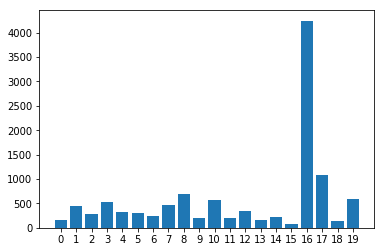

In [0]:
plt.bar(range(len(dic)), list(dic.values()), align='center')
plt.xticks(range(len(dic)), list(dic.keys()))
plt.show()

In [0]:
import collections
clf = DBSCAN(eps=0.06, min_samples=5, n_jobs=-1).fit(tfidf)
temp_list = list(clf.labels_)
print(temp_list)

dic = {}
for item in temp_list:
  if(item not in dic.keys()):
    dic[item]=1
  else:
    dic[item]+=1
dic = dict(collections.OrderedDict(sorted(dic.items())))
print(dic)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
tf_cosine = cosine_similarity(tfidf)

In [0]:
import numpy as np
from scipy import sparse
matrix = np.array(tf_cosine)
const = 1
new_matrix = const-matrix
# tfidf = sparse.csr_matrix(new_matrix)
# print(tfidf)
print(new_matrix)

[[ 0.00000000e+00  9.74765118e-01  9.30609378e-01 ...  1.00000000e+00
   1.00000000e+00  9.67585105e-01]
 [ 9.74765118e-01 -2.22044605e-16  9.92072344e-01 ...  8.87932745e-01
   1.00000000e+00  9.87990570e-01]
 [ 9.30609378e-01  9.92072344e-01  1.11022302e-16 ...  9.95844319e-01
   9.70028153e-01  9.92700559e-01]
 ...
 [ 1.00000000e+00  8.87932745e-01  9.95844319e-01 ... -4.44089210e-16
   9.81333126e-01  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  9.70028153e-01 ...  9.81333126e-01
  -2.22044605e-16  1.00000000e+00]
 [ 9.67585105e-01  9.87990570e-01  9.92700559e-01 ...  1.00000000e+00
   1.00000000e+00 -2.22044605e-16]]


In [0]:
data = pd.DataFrame(new_matrix.tolist())
data.to_csv('cosine_similarity_tfidf_csv.csv',index=False)

In [0]:
np.fill_diagonal(new_matrix, np.inf)
min_values = np.min(new_matrix, axis=0)
print(min_values)
min_values.sort()
print(min_values)

[0.77747585 0.73087211 0.7953081  ... 0.56532579 0.69161913 0.81929135]
[-4.4408921e-16 -4.4408921e-16 -4.4408921e-16 ...  1.0000000e+00
  1.0000000e+00  1.0000000e+00]


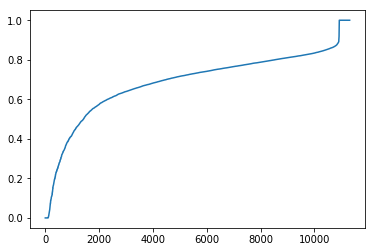

In [0]:
import matplotlib.pyplot as plt
plt.plot(min_values)


In [0]:
import collections
clf = DBSCAN(eps=0.6, min_samples=3, n_jobs=-1).fit(new_matrix)
temp_list = list(clf.labels_)
print(temp_list)

dic = {}
for item in temp_list:
  if(item not in dic.keys()):
    dic[item]=1
  else:
    dic[item]+=1
dic = dict(collections.OrderedDict(sorted(dic.items())))
print(dic)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1

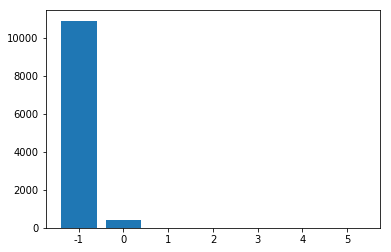

In [0]:
plt.bar(range(len(dic)), list(dic.values()), align='center')
plt.xticks(range(len(dic)), list(dic.keys()))
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(tfidf, labels)

clf=KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto',leaf_size=30, p=2, metric='minkowski')
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print(y_predicted)
print(metrics.accuracy_score(y_test, y_predicted))

[12  5  5 ...  8  5  5]
0.12902085542594557


In [13]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=.01)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(pred)
print(metrics.accuracy_score(y_test, y_predicted))

[12 18  0 ...  8  2 16]
0.12902085542594557
